# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier



---
## Step 0: Load The Data

In [4]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file='valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print('finished')

finished


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [6]:

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples ",n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples  4410
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Image Dimensions:  (32, 32, 3)


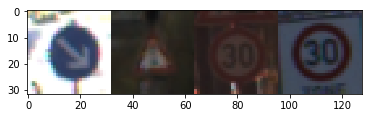

In [3]:

import matplotlib.pyplot as plt
import cv2
import numpy as np
%matplotlib inline


print('Image Dimensions: ',X_train[1500].shape)
plt.imshow(np.hstack((X_train[14800], X_train[1500], X_train[2500], X_train[3500] ) ))


----

## Step 2: Design and Test a Model Architecture



### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:


for i in range(X_train.shape[0]):
    image = np.zeros((32,32,3) )
    image[:,:,0]=cv2.equalizeHist(X_train[i,:,:,0])
    image[:,:,1]=cv2.equalizeHist(X_train[i,:,:,1])
    image[:,:,2]=cv2.equalizeHist(X_train[i,:,:,2])
    X_train[i,:,:,:]=image

for i in range(X_valid.shape[0]):
    image = np.zeros((32,32,3))
    image[:,:,0]=cv2.equalizeHist(X_valid[i,:,:,0])
    image[:,:,1]=cv2.equalizeHist(X_valid[i,:,:,1])
    image[:,:,2]=cv2.equalizeHist(X_valid[i,:,:,2])
    X_valid[i,:,:,:]=image
    
for i in range(X_test.shape[0]):
    image = np.zeros((32,32,3))
    image[:,:,0]=cv2.equalizeHist(X_test[i,:,:,0])
    image[:,:,1]=cv2.equalizeHist(X_test[i,:,:,1])
    image[:,:,2]=cv2.equalizeHist(X_test[i,:,:,2])
    X_test[i,:,:,:]=image
    
    
X_train = np.asfarray(X_train, dtype='float32')
X_valid = np.asfarray(X_valid, dtype='float32')
X_test = np.asfarray(X_test, dtype='float32')

for i in range(X_train.shape[0]):
    X_train[i,:,:,:]=(X_train[i,:,:,:]-128)/128
for i in range(X_valid.shape[0]):
    X_valid[i,:,:,:]=(X_valid[i,:,:,:]-128)/128
for i in range(X_test.shape[0]):
    X_test[i,:,:,:]=(X_test[i,:,:,:]-128)/128


print('finished')



finished


### Model Architecture

In [5]:

import tensorflow as tf
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle
EPOCHS = 12
BATCH_SIZE = 128

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    W1= tf.Variable(tf.truncated_normal([5,5,3,9],mean=mu,stddev=sigma,dtype=tf.float32,seed=None,name=None))
    b1= tf.Variable(tf.zeros(9))
    
    W2= tf.Variable(tf.truncated_normal([5,5,9,16],mean=mu,stddev=sigma,dtype=tf.float32,seed=None,name=None))
    b2= tf.Variable(tf.zeros(16))
    
    w3= tf.Variable(tf.truncated_normal([400,120],mean=mu,stddev=sigma,dtype=tf.float32,seed=None,name=None))
    b3= tf.Variable(tf.zeros(120))
    
    w4= tf.Variable(tf.truncated_normal([120,84],mean=mu,stddev=sigma,dtype=tf.float32,seed=None,name=None))
    b4= tf.Variable(tf.zeros(84))
    
    w5= tf.Variable(tf.truncated_normal([84,43],mean=mu,stddev=sigma,dtype=tf.float32,seed=None,name=None))
    b5= tf.Variable(tf.zeros(43))
   
    # TODO: Layer 1: Convolutional. Input = 32x32x3. Output = 25x25x9.
    conv1 = tf.nn.conv2d(x,W1,strides=[1,1,1,1],padding='VALID')
    conv1 = tf.nn.bias_add(conv1,b1)
    # TODO: Activation.
    conv1=tf.nn.relu(conv1)
    # TODO: Pooling. Input = 25x25x9. Output = 11x11x9.
    p1 = tf.nn.max_pool(conv1,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
    # TODO: Layer 2: Convolutional. Output = 7x7x16.
    conv2 = tf.nn.conv2d(p1,W2,strides=[1,1,1,1],padding='VALID')
    conv2 = tf.nn.bias_add(conv2,b2)
    # TODO: Activation.
    conv2=tf.nn.relu(conv2)
    # TODO: Pooling. Input = 7x7x16. Output = 4x4x16.
    p2 = tf.nn.max_pool(conv2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
    # TODO: Flatten. Input = 5x5x16. Output =256.
    flat = flatten(p2)
    # TODO: Layer 3: Fully Connected. Input = 192. Output = 120.
    fc1 = tf.add(tf.matmul(flat,w3),b3)
    # TODO: Activation.
    fc1 = tf.nn.relu(fc1)
    #fc1 = tf.nn.dropout(fc1, keep_prob=0.5)
    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2 = tf.add(tf.matmul(fc1,w4),b4)
    # TODO: Activation.
    fc2 = tf.nn.relu(fc2)
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    logits = tf.add(tf.matmul(fc2,w5),b5)
    return logits

x = tf.placeholder(tf.float32,(None,32,32,3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

logits =LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y,logits=logits)
loss = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
training_operation = optimizer.minimize(loss)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [6]:

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './mysession')
    print("Model saved")
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))




Training...

EPOCH 1 ...
Validation Accuracy = 0.815

EPOCH 2 ...
Validation Accuracy = 0.889

EPOCH 3 ...
Validation Accuracy = 0.919

EPOCH 4 ...
Validation Accuracy = 0.921

EPOCH 5 ...
Validation Accuracy = 0.912

EPOCH 6 ...
Validation Accuracy = 0.930

EPOCH 7 ...
Validation Accuracy = 0.934

EPOCH 8 ...
Validation Accuracy = 0.934

EPOCH 9 ...
Validation Accuracy = 0.940

EPOCH 10 ...
Validation Accuracy = 0.943

EPOCH 11 ...
Validation Accuracy = 0.937

EPOCH 12 ...
Validation Accuracy = 0.936

Model saved
Test Accuracy = 0.925


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

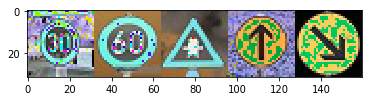

In [6]:

import matplotlib.image as mpimg
img1 = np.asfarray(mpimg.imread('new_test_images/1.jpg'), dtype='float32')
img3 = np.asfarray(mpimg.imread('new_test_images/3.jpg'), dtype='float32')
img11 = np.asfarray(mpimg.imread('new_test_images/11.jpg'), dtype='float32')
img35 = np.asfarray(mpimg.imread('new_test_images/35.jpg'), dtype='float32')
img38 = np.asfarray(mpimg.imread('new_test_images/38.jpg'), dtype='float32')



all_images = np.hstack((img1,img3,img11,img35,img38))

img1=(img1-128)/128
img3=(img3-128)/128
img11=(img11-128)/128
img35=(img35-128)/128
img38=(img38-128)/128

new_X_test = [img1,img3,img11,img35,img38]
new_y_test=[1,3,11,35,38]



plt.imshow(all_images)



### Predict the Sign Type for Each Image

In [20]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
with tf.Session() as sess:
    new_saver = tf.train.import_meta_graph("mysession.meta")
    new_saver.restore(sess, tf.train.latest_checkpoint('.'))

    accuracy = evaluate(X_test,y_test)
    print("Test Accuracy = {:.3f}".format(accuracy))
    prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
    result = sess.run(prediction,feed_dict={x:[img1],y:[1]})
    print('prediction result of first image: ',result)
    result = sess.run(prediction,feed_dict={x:[img3],y:[3]})
    print('prediction result of second image: ',result)
    result = sess.run(prediction,feed_dict={x:[img11],y:[11]})
    print('prediction result of third image: ',result)
    result = sess.run(prediction,feed_dict={x:[img35],y:[35]})
    print('prediction result of fourth image: ',result)
    result = sess.run(prediction,feed_dict={x:[img38],y:[38]})
    print('prediction result of fifth image: ',result)

INFO:tensorflow:Restoring parameters from .\mysession
Test Accuracy = 0.925
prediction result of first image:  [ True]
prediction result of second image:  [ True]
prediction result of third image:  [ True]
prediction result of fourth image:  [ True]
prediction result of fifth image:  [ True]


### Analyze Performance

In [22]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess:
    new_saver = tf.train.import_meta_graph("mysession.meta")
    new_saver.restore(sess, tf.train.latest_checkpoint('.'))
    accuracy = evaluate(new_X_test,new_y_test)
    print("New images test accuracy = {:.3f}%".format(accuracy*100))


INFO:tensorflow:Restoring parameters from .\mysession
New images test accuracy = 100.000%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [25]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    new_saver = tf.train.import_meta_graph("mysession.meta")
    new_saver.restore(sess, tf.train.latest_checkpoint('.'))
    softmax_propabilities = tf.nn.softmax(logits,-1)
    top_five = tf.nn.top_k(softmax_propabilities,k=5)
    output = sess.run(top_five,feed_dict={x:new_X_test})
    print(output)
    
    


INFO:tensorflow:Restoring parameters from .\mysession
TopKV2(values=array([[  9.99933839e-01,   6.23782325e-05,   3.27759949e-06,
          4.64077118e-07,   1.56517544e-07],
       [  9.82837081e-01,   1.71621814e-02,   7.34060279e-07,
          1.79706330e-08,   1.47235624e-09],
       [  9.85541403e-01,   1.18939187e-02,   2.46886560e-03,
          9.54436255e-05,   5.25370865e-07],
       [  9.99999642e-01,   2.60439634e-07,   8.69375327e-08,
          1.92123140e-09,   2.29829680e-11],
       [  9.99999762e-01,   2.04484422e-07,   8.54978657e-11,
          5.45021840e-11,   1.12779881e-11]], dtype=float32), indices=array([[ 1,  0,  5,  4,  2],
       [ 3,  2,  5, 31, 19],
       [11, 30, 27, 18, 20],
       [35, 40, 36, 33, 34],
       [38, 40, 36, 34, 12]]))
